In [1]:
#OPENCV PROJECT-17

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
def function1():
    img = cv2.imread('/home/sunbeam/Documents/gitdata/ML/dataset/images2/set2/someshapes.jpg')
    # binarise the image
    edges_detected = cv2.Canny(img, 255, 255)
    contours, hierarchy = cv2.findContours(edges_detected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    index = 1
    for c in contours:
        # highlighting
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        m = cv2.moments(c)
        print(m)
        cx = int(m['m10'] / m['m00'])
        cy = int(m['m01'] / m['m00'])
        #draw a circle at centre
        cv2.circle(img,(cx,cy),10,(0,51,255),2)
        index += 1
    cv2.imshow('original', img)
    cv2.imwrite('/tmp/original.jpg',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
function1()

{'m00': 23816.5, 'm10': 17720126.666666664, 'm01': 12832573.0, 'm20': 13246755439.583332, 'm11': 9547770773.541666, 'm02': 6976527437.916666, 'm30': 9948947817781.3, 'm21': 7137454545848.583, 'm12': 5190710925040.684, 'm03': 3826074051443.0, 'mu20': 62497085.80712509, 'mu11': -14124.291627883911, 'mu02': 62206282.40141392, 'mu30': 790914.552734375, 'mu21': -11312826.149051666, 'mu12': -866841.079032898, 'mu03': 15186642.625976562, 'nu20': 0.11018028425832609, 'nu11': -2.4900656509176387e-05, 'nu02': 0.10966760752323113, 'nu30': 9.035136506932378e-06, 'nu21': -0.00012923384477185574, 'nu12': -9.90249509482618e-06, 'nu03': 0.00017348699519223376}
{'m00': 67259.5, 'm10': 14131984.333333332, 'm01': 36230079.83333333, 'm20': 3329159500.4166665, 'm11': 7612335682.458333, 'm02': 19875866454.25, 'm30': 850713876303.2001, 'm21': 1793282789854.7334, 'm12': 4176134205620.7334, 'm03': 11094332722998.951, 'mu20': 359869196.4807358, 'mu11': -15295.471661567688, 'mu02': 360129870.8720932, 'mu30': -55

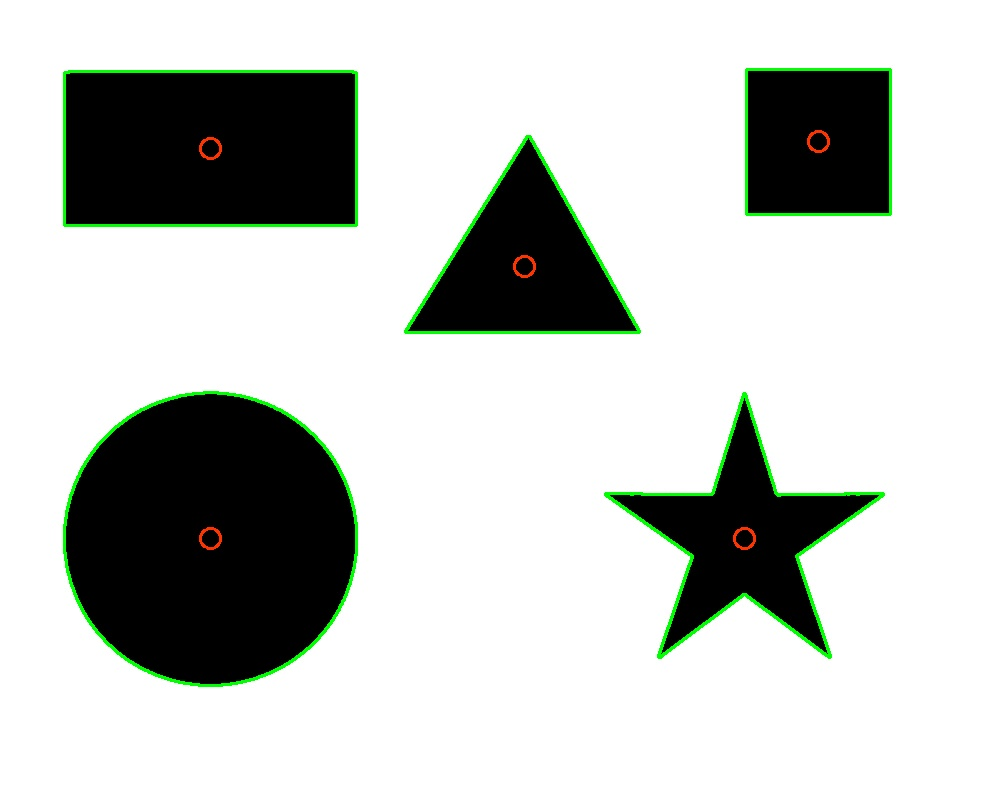

In [3]:
from IPython.display import Image, display

listOfImageNames = ['/tmp/original.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [4]:
def function2():
    img = cv2.imread('/home/sunbeam/Documents/gitdata/ML/dataset/images2/set2/someshapes.jpg')
    # binarise the image
    edges_detected = cv2.Canny(img, 255, 255)
    contours, hierarchy = cv2.findContours(edges_detected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    index = 1
    for c in contours:
        # highlighting
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        # find the contours centroid
        m = cv2.moments(c)
        # center of the contour
        cx = int(m['m10'] / m['m00'])
        cy = int(m['m01'] / m['m00'])
        # draw the circle
        # cv2.circle(img, (cx, cy), 30, (0, 255, 255), 2)
        # cv2.putText(img, f"{index}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        # detect the shape
        approx = cv2.approxPolyDP(c, 0.01 * cv2.arcLength(c, True), True)
        print(f"index: {index}, edges : {len(approx)}")
        shape = ''
        edges = len(approx)
        if edges == 3:
            shape = 'Trianlge'
        elif edges == 4:
            shape = 'Quadrilateral'
        elif edges == 10:
            shape = 'Star'
        elif edges >= 15:
            shape = 'Circle'
        cv2.putText(img, shape, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 51, 255), 2)
        index += 1
    cv2.imshow('original', img)
    cv2.imwrite('/tmp/original.jpg',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
function2()

index: 1, edges : 10
index: 2, edges : 15
index: 3, edges : 3
index: 4, edges : 4
index: 5, edges : 4


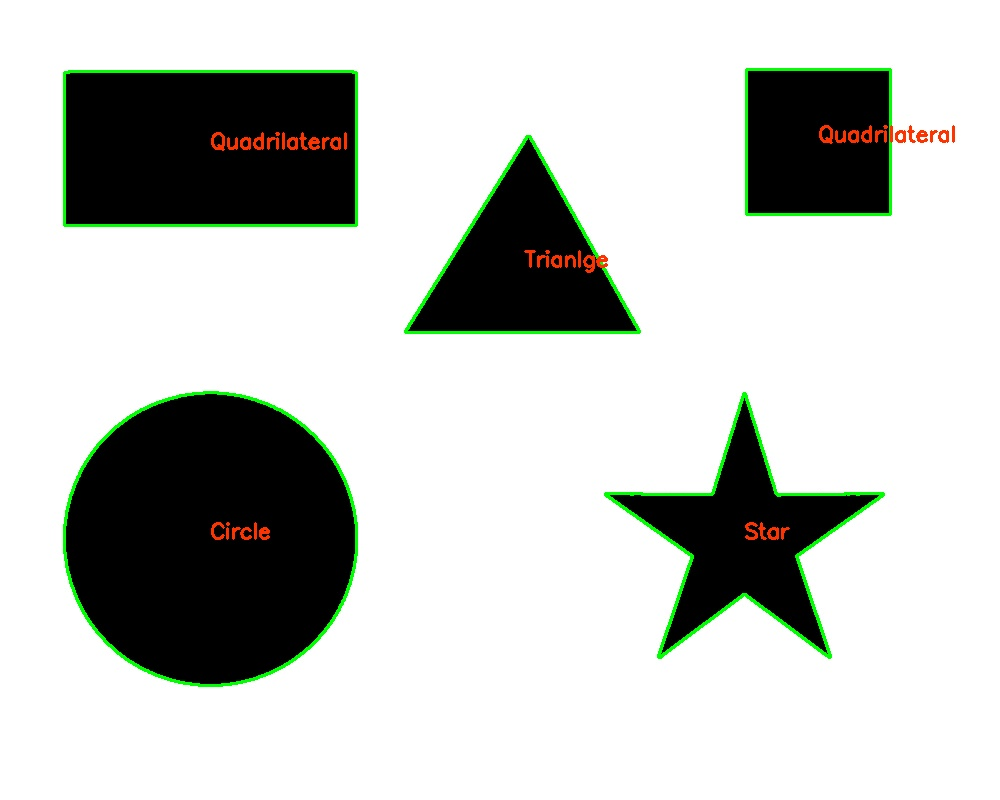

In [5]:
from IPython.display import Image, display

listOfImageNames = ['/tmp/original.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [6]:
def function3():
    img = cv2.imread('/home/sunbeam/Documents/gitdata/ML/dataset/images2/set2/someshapes.jpg')
    # binarise the image
    edges_detected = cv2.Canny(img, 255, 255)
    contours, hierarchy = cv2.findContours(edges_detected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shape_count = {
        'circle': 0,
        'triangle': 0,
        'rect': 0,
        'star': 0
    }
    index = 1
    for c in contours:
        # highlighting
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        # find the contours centroid
        m = cv2.moments(c)
        # center of the contour
        cx = int(m['m10'] / m['m00'])
        cy = int(m['m01'] / m['m00'])
        # draw the circle
        # cv2.circle(img, (cx, cy), 30, (0, 255, 255), 2)
        # cv2.putText(img, f"{index}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        # detect the shape
        approx = cv2.approxPolyDP(c, 0.01 * cv2.arcLength(c, True), True)
        print(f"index: {index}, edges : {len(approx)}")
        shape = ''
        edges = len(approx)
        if edges == 3:
            shape = 'tri'
            shape_count['triangle'] += 1
        elif edges == 4:
            shape = 'quad'
            shape_count['rect'] += 1
        elif edges == 10:
            shape = 'star'
            shape_count['star'] += 1
        elif edges > 10:
            shape = 'circle'
            shape_count['circle'] += 1
        cv2.putText(img, shape, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 51, 255), 2)
        index += 1
    # show the count
    cv2.putText(img, f"S: {shape_count['star']}, R: {shape_count['rect']}, C: {shape_count['circle']}, T: {shape_count['triangle']}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    cv2.imshow('original', img)
    cv2.imwrite('/tmp/original.jpg',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
function3()

index: 1, edges : 10
index: 2, edges : 15
index: 3, edges : 3
index: 4, edges : 4
index: 5, edges : 4


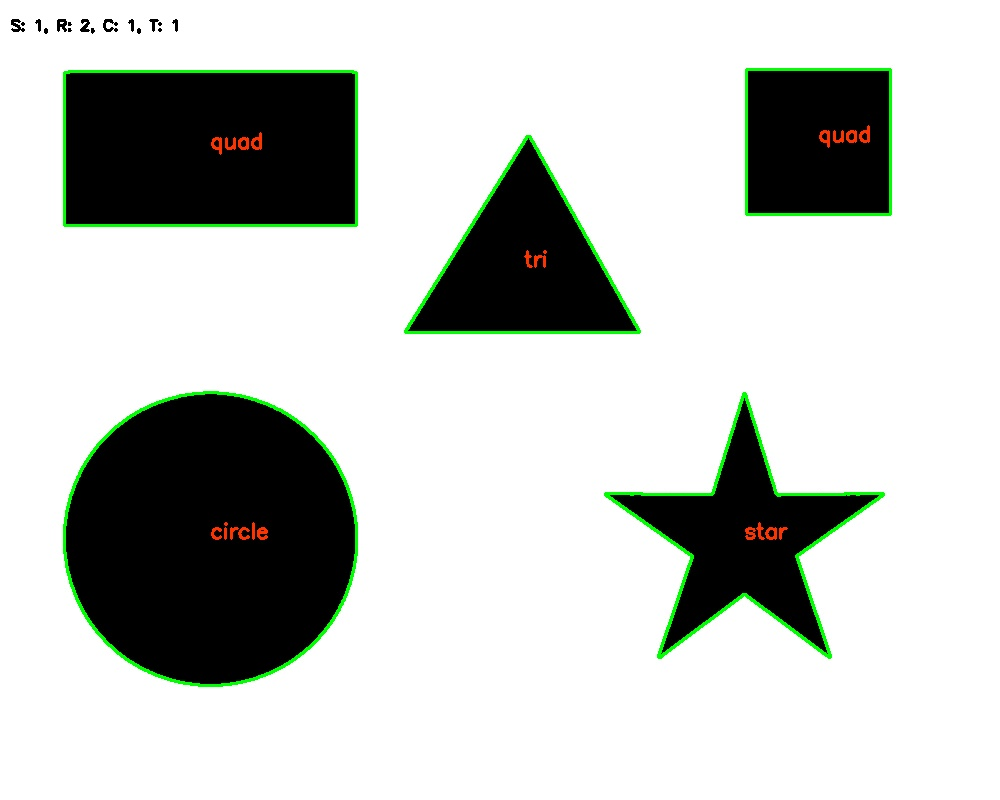

In [7]:
from IPython.display import Image, display

listOfImageNames = ['/tmp/original.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))